

# Creating a model based on MNIST Dataset of Handwritten Digits
- Lets Load our Dataset

In [2]:
from keras.datasets import mnist

#load MNIST Dataset

(x_train, y_train), (x_test,y_test) = mnist.load_data()

print(y_train.shape)

Using TensorFlow backend.


(60000,)


# Step 2A: Examine the size and image dimensions
- Check the number of samples, dimensions and whether images are color or gray
- We see that our training data consist of 60000 samples of training data, and 10000 samples of test data
- Our labels are properly sized as well
- Our Image dimension are 28*28*1 with no color channels.

In [3]:
# printing number of training samples and test samples

print("Initial Shape of x_train", str(x_train.shape))

print("Number of samples in our training dataset:" + str(len(x_train)))
print("Number of labels in our training dataset:" + str(len(y_train)))
print("Number of samples in our test dataset:" + str(len(x_test)))
print("Number of labels in our test dataset:" + str(len(y_test)))

print()

print("Dimension of x_train:" + str(x_train[0].shape))
print("Labels in x_train:" + str(y_train.shape))

print()

print("Dimension of x_test:" + str(x_test[0].shape))
print("Labels in x_test:" + str(y_test.shape))

Initial Shape of x_train (60000, 28, 28)
Number of samples in our training dataset:60000
Number of labels in our training dataset:60000
Number of samples in our test dataset:10000
Number of labels in our test dataset:10000

Dimension of x_train:(28, 28)
Labels in x_train:(60000,)

Dimension of x_test:(28, 28)
Labels in x_test:(10000,)


## Step 2B - Let's take a look at some of images in the dataset

- Using OpenCV
- Using Matplotlib

In [4]:
#using OpenCV
#import OpenCV and numpy
import cv2
import numpy as np

#Using OpenCV to display 6 random images from our dataset

for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img =  x_train[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows() 

### Lets do the same thing using matplotlib to plot 6 images

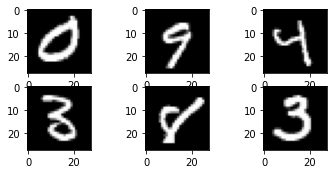

In [4]:
#import matplotlib
import matplotlib.pyplot as plt

#plt 6 images, subplots arguments are nrows, ncols, index
#we set the color map to grey since our dataset is grayscale

plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

#Display out plots
plt.show()

## Step 3A - Prepare our dataset for training

In [5]:
#lets Store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#Creating our data in right 'shape' needed for keras
#We need to add a 4th dimension to our data which is depth
#our original image shape is (60000,28,28) we will add depth to it (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,1)

#store the shape of a single image
#here the input shape is in integer
#we created image shape for our first layer of convolution (1 because of grayscale)
input_shape = (img_rows, img_cols, 1)

#Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalize our data from a range of (0-255) to (0-1)
x_train /= 255
x_test /=255

#Printing our modified data in accordance with keras
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Step 3B - Hot Encode our labels(Y)

In [6]:
from keras.utils import np_utils

#Now we hot one encoded outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#Count the number of columns in our hot encoded matrix
print ('Number of Classes:' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes:10


## Step 4 - Create Our Model
- We're constructing a simple CNN that uses 32 filters of size 3*3
- We'have added a second convolution layer of 64 filters of the same size 3*3
- We downsampled our data to 2x2, here we apply a dropout where p is set to 0.25
- After that we flattened our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- In the final step 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units
- Note dropout shouldn't be greater than 0.5 preferably

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

#Create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

## Step 5 - Train our Model
- we enter our formatted data as inputs and set the batch size, number of epochs
- we store our models training result for plotting in future
- Then we used keras model evaluation function to output the model's final performance. Here we are examining Test Loss and Test Accuracy

In [9]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,                                     #how much data we want to see while training
                   validation_data = (x_test, y_test))
   
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.5812 - accuracy: 0.8182 - val_loss: 0.1976 - val_accuracy: 0.9393- accura
Epoch 2/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.2949 - accuracy: 0.9112 - val_loss: 0.1417 - val_accuracy: 0.9582
Epoch 3/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2260 - accuracy: 0.9322 - val_loss: 0.1074 - val_accuracy: 0.9664
Epoch 4/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1761 - accuracy: 0.9474 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 5/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1461 - accuracy: 0.9560 - val_loss: 0.0702 - val_accuracy: 0.9776oss: 0.1462 - accura
Epoch 6/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1248 - accuracy: 0.9629 - val_loss: 0.0592 - val_accuracy: 0.9811
Epoch 7/10
60000/60000 [==========

## Step 6 - Plotting our Loss and Acuuracy Charts

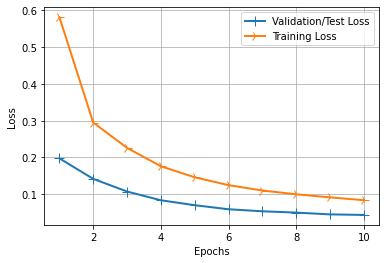

In [10]:
# Plotting our loss Charts

import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

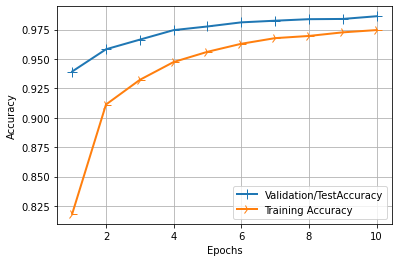

In [12]:
#plotting accuracy charts

import matplotlib.pyplot as plt

history_dict = history.history

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(accuracy_values) +1)

line1 = plt.plot(epochs, val_accuracy_values, label='Validation/TestAccuracy')
line2 = plt.plot(epochs, accuracy_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Step 7A - Saving our Model


In [13]:
model.save(r"C:\Users\yrsin\Desktop\git_Hub\tensorflow\sharedwindows10\testfolder\handwritten_digits_CNN.h5")
print("model Saved")

model Saved


# Step 7B - Loading our Model

In [14]:
from keras.models import load_model

classifier = load_model(r'C:\Users\yrsin\Desktop\git_Hub\tensorflow\sharedwindows10\testfolder\handwritten_digits_CNN.h5')

# Step 8 - Lets input some data to test our classifier

In [17]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0,0,0, imageL.shape[0], cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152,70), cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name, expanded_image)
    
for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    #Get Prediction
    res = str(classifier.predict_classes(input_im,1,verbose = 0)[0])
    
    draw_test("Prediction",res,imageL)
    cv2.waitKey(0)
        
cv2.destroyAllWindows()

# Predictions of Classifier

![](Predictions.png)

# Confusion Matrix and classification Report

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1127    3    1    0    1    2    0    1    0]
 [   3    2 1022    1    1    0    0    3    0    0]
 [   0    0    3  994    0    8    0    3    2    0]
 [   0    1    1    0  968   

# Displaying our Misclassified Data

In [20]:
import cv2
import numpy as np
from keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications
print("Indices of misclassifed data are: \n\n" + str(result_indices))

Indices of misclassifed data are: 

(array([ 247,  259,  321,  445,  449,  582,  720,  726,  740,  844,  883,
        938,  947,  965, 1014, 1039, 1112, 1182, 1226, 1232, 1242, 1247,
       1290, 1299, 1319, 1326, 1393, 1522, 1527, 1530, 1549, 1609, 1678,
       1681, 1709, 1717, 1737, 1878, 1901, 2018, 2035, 2043, 2093, 2098,
       2109, 2118, 2130, 2135, 2182, 2272, 2293, 2387, 2406, 2447, 2454,
       2462, 2488, 2607, 2648, 2654, 2896, 2921, 2927, 2939, 2952, 2953,
       3030, 3060, 3289, 3422, 3503, 3520, 3558, 3559, 3597, 3604, 3726,
       3751, 3767, 3780, 3808, 3853, 3906, 3941, 4075, 4078, 4163, 4176,
       4205, 4224, 4238, 4248, 4256, 4265, 4289, 4497, 4500, 4536, 4601,
       4639, 4740, 4761, 4807, 4814, 4823, 4956, 5331, 5642, 5734, 5887,
       5937, 5955, 5973, 6011, 6505, 6555, 6572, 6576, 6597, 6625, 6651,
       6783, 7434, 8325, 8408, 8527, 9009, 9015, 9019, 9024, 9280, 9634,
       9692, 9729, 9770, 9888, 9982], dtype=int64),)


# Displaying the Misclassification

In [21]:
import cv2 
#from keras.models import load_model

#classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):

    input_im = x_test[result_indices[0][i]]
    #print(y_test[result_indices[0][i]])
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL, y_test[result_indices[0][i]]) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

# Output of Misclassified data

![](Misclassification.png)